# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Kaggle (Melbourne Housing Snapshot) - https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

2. **Deskripsi Singkat**:
   Dataset **Melbourne Housing Snapshot** dari Kaggle berisi data penjualan properti di kota Melbourne dan sekitarnya. Setiap baris mewakili satu transaksi properti dengan berbagai fitur seperti **Suburb** (kawasan), **Type** (tipe rumah), **Rooms** (jumlah kamar), **Price** (harga jual), **Method** (metode penjualan), **Date** (tanggal transaksi), **Distance** (jarak dari pusat kota), **Landsize** (luas tanah), **YearBuilt** (tahun dibangun), serta koordinat geografis. 
   
   Dataset ini berformat **CSV** dan cocok digunakan untuk proyek **regresi**, misalnya dalam memprediksi harga rumah berdasarkan variabel-variabel yang tersedia. Namun, terdapat beberapa **missing values** pada kolom seperti *BuildingArea* dan *YearBuilt*, sehingga perlu dilakukan tahap praproses data terlebih dahulu. Dataset ini menarik untuk eksplorasi hubungan antara lokasi, ukuran, dan tipe properti dengan harga jual, serta sebagai bahan pembelajaran penerapan **model regresi** dalam analisis pasar properti.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [77]:
# Library untuk manipulasi data
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pemrosesan data & modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [78]:
# Membaca dataset dari file CSV
df = pd.read_csv("../melb_data.csv")

# Menampilkan 5 baris pertama
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [79]:
# Menampilkan informasi data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [80]:
# Menampilkan statistik deskriptif
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [81]:
# Mengecek jumlah nilai kosong di setiap kolom
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

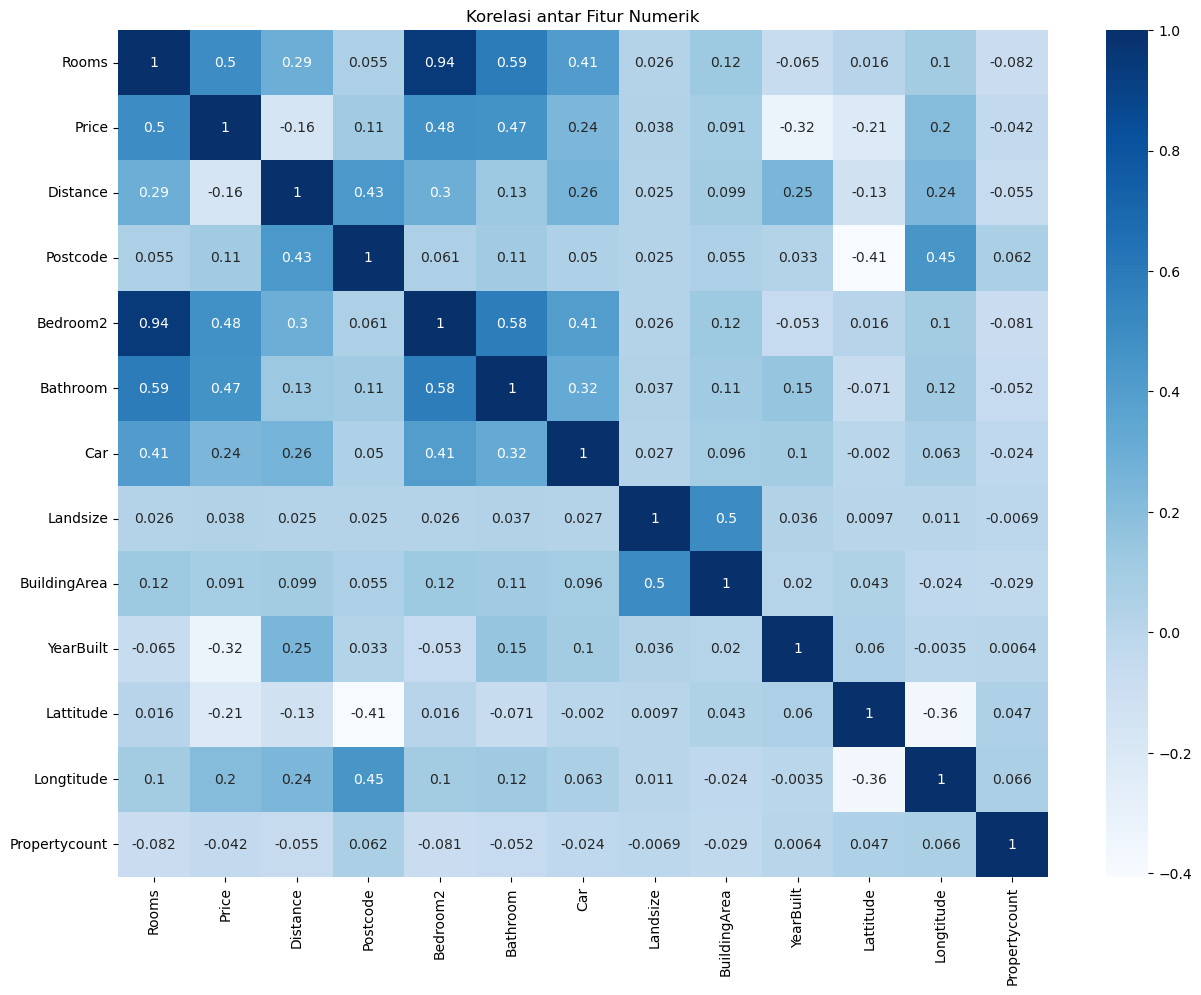

In [82]:
# --- Cek korelasi antar fitur numerik ---
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

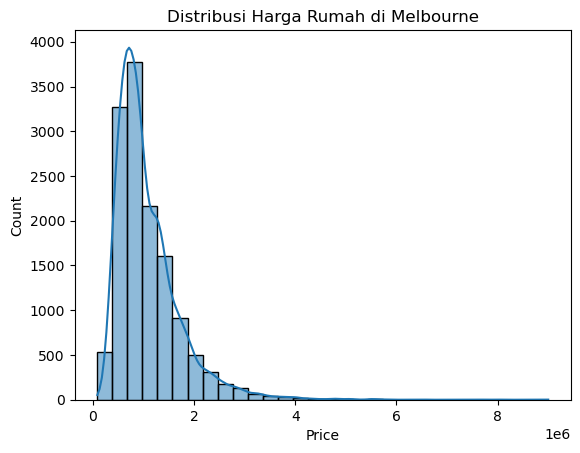

In [83]:
# --- Distribusi harga rumah ---
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Distribusi Harga Rumah di Melbourne")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Menghapus kolom yang tidak relevan ###

In [84]:
# Hapus kolom yang tidak relevan
cols_to_drop = ['Address', 'SellerG', 'Date']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

### Menghapus data kosong (Missing Values) ###

In [85]:
# Hapus baris dengan missing value
df.dropna(inplace=True)

### Memeriksa data duplikat ###

In [86]:
# Hapus duplikat data
df.drop_duplicates(inplace=True)

###  Pisahkan kolom numerik dan kategorikal ###

In [87]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

### One-Hot Encoding untuk kolom kategorikal

In [88]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded.columns = encoder.get_feature_names_out(categorical_cols)

### Gabungkan data numerik dan hasil encoding

In [89]:
df_encoded = pd.concat([df[numerical_cols].reset_index(drop=True), encoded.reset_index(drop=True)], axis=1)

### Normalisasi/Standarisasi fitur

In [90]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_encoded.drop("Price", axis=1)), columns=df_encoded.drop("Price", axis=1).columns)

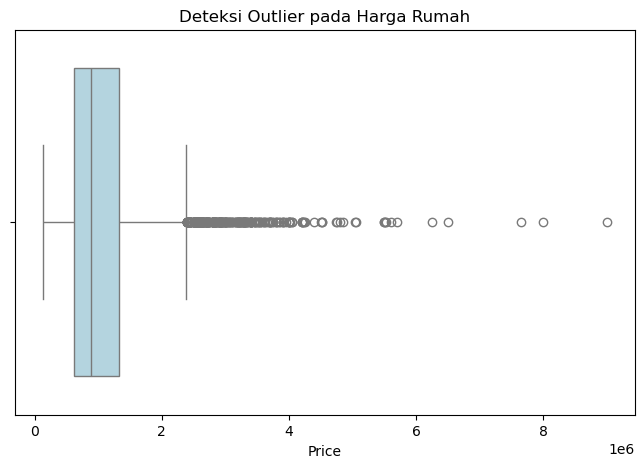

In [91]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price"], color="lightblue")
plt.title("Deteksi Outlier pada Harga Rumah")
plt.show()

### Modeling ###

In [92]:
# Gabungkan kembali dengan kolom target
df_processed = pd.concat([X_scaled, df_encoded["Price"].reset_index(drop=True)], axis=1)

print("Data setelah preprocessing:", df_processed.shape)
df_processed.to_csv("melb_data_preprocessed.csv", index=False)

Data setelah preprocessing: (6183, 347)


### Split data ###

In [93]:
# Pisahkan fitur (X) dan target (y)
X = df_processed.drop("Price", axis=1)   
y = df_processed["Price"]                

# Bagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Cek jumlah data latih dan data uji
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji  :", X_test.shape[0])

Jumlah data latih: 4946
Jumlah data uji  : 1237


### Latih Model ###

In [94]:
# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,     
    random_state=42,      
    n_jobs=-1             
)

# Latih model menggunakan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi performa model menggunakan MSE dan R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== HASIL EVALUASI MODEL ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score                : {r2:.4f}")

=== HASIL EVALUASI MODEL ===
Mean Squared Error (MSE): 89003373490.71
R² Score                : 0.8021
